In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import librosa

In [2]:
df = pd.read_csv("/Users/cagrierdem/Desktop/dat/20190915/cagri/sustained_strong_70/emg_d9-db-d4-2b-d4-17.csv", index_col=0)
df.index.name = 'time'

In [3]:
df

,emg1,emg2,emg3,emg4,emg5,emg6,emg7,emg8
time,,,,,,,,
6.599874,-0.015748,-0.015748,-0.007874,-0.007874,0.000000,-0.007874,-0.015748,-0.015748
6.600083,-0.015748,-0.055118,-0.031496,-0.015748,-0.015748,-0.007874,-0.007874,0.000000
6.600292,-0.015748,0.000000,0.000000,-0.007874,0.007874,0.007874,-0.007874,-0.007874
6.600704,0.000000,0.000000,0.007874,-0.007874,-0.015748,0.000000,-0.007874,0.015748
6.601117,0.000000,0.000000,-0.015748,0.000000,-0.007874,-0.015748,-0.015748,0.000000
6.601521,0.000000,0.039370,0.023622,-0.007874,0.000000,-0.015748,0.000000,0.007874
6.601925,0.000000,-0.015748,-0.055118,-0.015748,-0.023622,-0.015748,0.000000,-0.007874
6.602428,0.000000,-0.015748,0.000000,-0.007874,0.007874,-0.007874,0.000000,-0.015748
6.602932,-0.015748,-0.023622,0.015748,-0.015748,-0.007874,-0.007874,0.007874,0.000000


In [5]:
sound, sr = librosa.load('/Users/cagrierdem/Desktop/dat/20190915/cagri/sustained_strong_70/sustained_strong_70'+'.wav', sr=48000)
print(sound.size / 48000)

138.82


In [7]:
time = []
    
file = open('/Users/cagrierdem/Desktop/dat/20190915/cagri/sustained_strong_70/timeline.txt', 'r')
metro_timeline = file.read().split(',')
metro_timeline = [float(i) for i in metro_timeline]
file.close()

file = open('/Users/cagrierdem/Desktop/dat/20190915/cagri/sustained_strong_70/audio_start.txt', 'r')
start = float(file.read())
file.close

print(start)
for i in range(sound.size):
    time.append(i * 1 / 48000 + start)

6.688771963119507


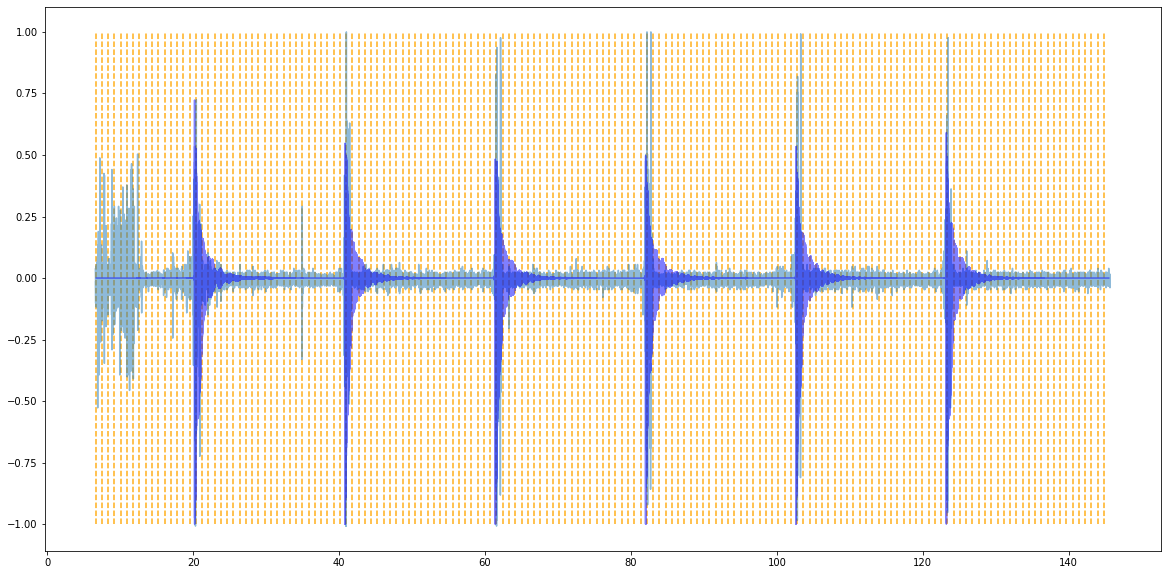

In [8]:
plt.figure(figsize=(20, 10))

plt.plot(df.index, df.emg2, alpha=0.5)
# for i in range(8):
#     plt.plot(df.index, df['emg'+str(i+1), alpha=0.5])
plt.plot(time, sound, 'b', alpha=0.5)
plt.vlines(metro_timeline, -1, 1, colors = "orange", linestyles = "dashed", alpha= 0.9)